In [1]:
# Beat tracking example
from __future__ import print_function
import librosa
import librosa.display

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
import IPython.display as ipd

In [4]:
import sklearn

In [5]:
filename = '../data/raw/train_curated/0006ae4e.wav'

In [6]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

In [7]:
ipd.Audio(filename) # load a local WAV file

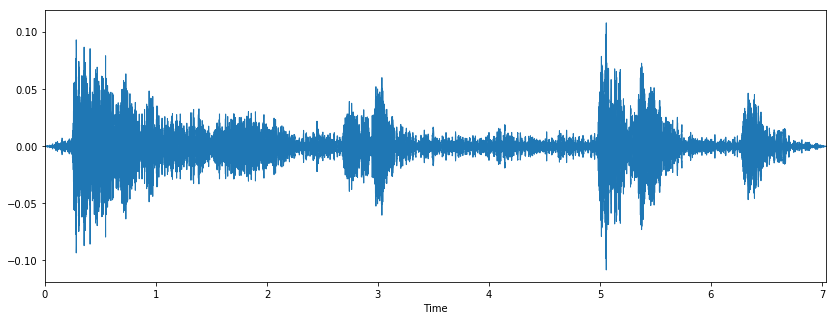

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [9]:
yt, index = librosa.effects.trim(y, top_db=20 )

In [11]:
print(librosa.get_duration(y), librosa.get_duration(yt))

7.039818594104308 6.524807256235827


In [12]:
index

array([  4608, 148480])

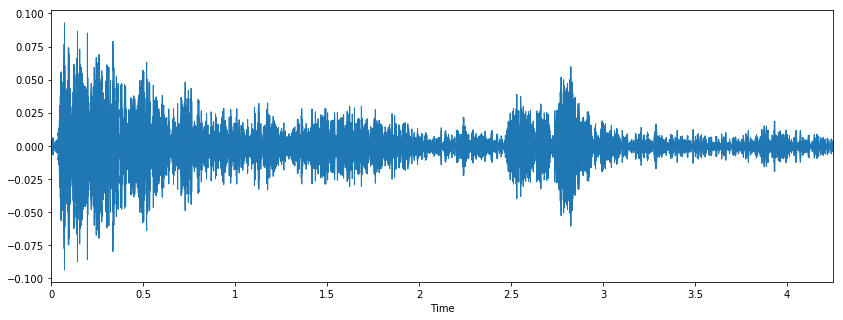

In [118]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y[4608:98304], sr=sr)

In [126]:
ipd.Audio('../data/raw/0006ae4e_1p.wav') # load a local WAV file

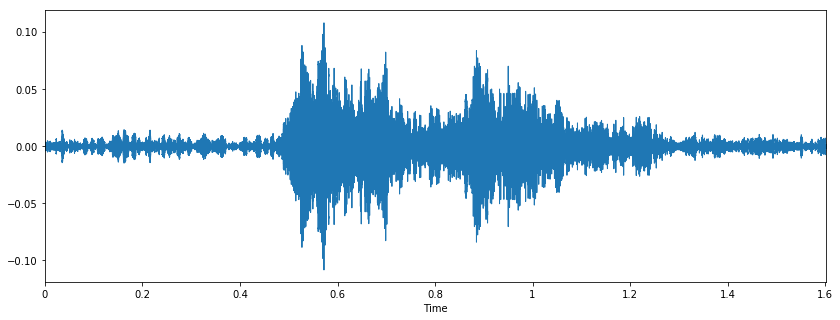

In [119]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y[98816:134144], sr=sr)

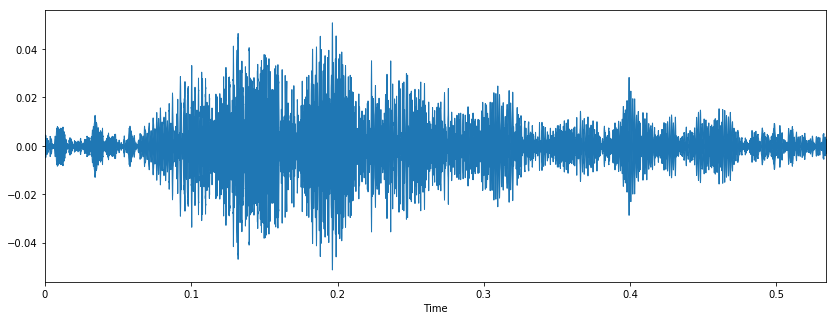

In [120]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y[136704:148480], sr=sr)

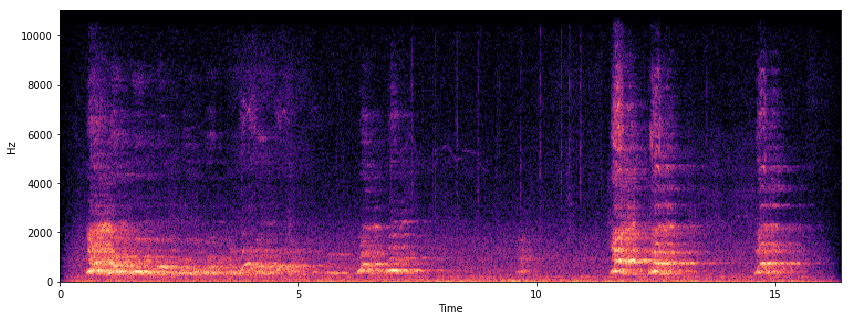

In [10]:
Y = librosa.stft(y,  n_fft=512, win_length=512,hop_length=220)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

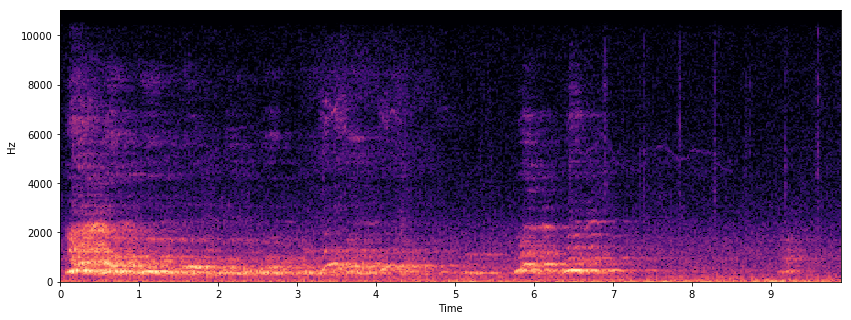

In [121]:
Y = librosa.stft(y[4608:98304],  n_fft=512, win_length=512,hop_length=220)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

In [139]:

librosa.effects.split(y, top_db=20)

array([[  4608,  98304],
       [ 98816, 134144],
       [136704, 148480]])

In [132]:
librosa.output.write_wav('../data/raw/0006ae4e_1p.wav', y[0:98304],sr=sr)

In [133]:
librosa.output.write_wav('../data/raw/0006ae4e_2p.wav', y[98816:134144], sr=sr)

In [134]:
librosa.output.write_wav('../data/raw/0006ae4e_3p.wav', y[136704:148480], sr=sr)

In [135]:
 librosa.core.amplitude_to_db(y, ref=1.0, amin=1e-05, top_db=80.0)

array([-99.31526 , -99.31471 , -78.93119 , ..., -89.03037 , -98.408264,
       -90.773224], dtype=float32)

In [11]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [12]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 161.50 beats per minute


In [13]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [14]:
beat_times

array([0.30185941, 0.65015873, 0.99845805, 1.34675737, 1.69505669,
       2.06657596, 2.41487528, 2.7631746 , 3.11147392, 3.45977324,
       3.80807256, 4.20281179, 4.62077098, 5.0155102 , 5.36380952,
       5.68888889, 6.01396825, 6.33904762])

#### MFCC

In [15]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
# also N of FFT is defined with this value
hop_length = 512

In [16]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, dct_type=2, n_mfcc=40)

In [17]:
mfcc

array([[-6.85957159e+02, -6.54059652e+02, -6.14304621e+02, ...,
        -6.58003899e+02, -6.87329966e+02, -7.14510209e+02],
       [ 6.13786158e+01,  8.96597637e+01,  1.15910731e+02, ...,
         8.22869536e+01,  6.16877952e+01,  3.88982089e+01],
       [ 2.17126088e+01,  2.44961731e+01,  1.69673815e+01, ...,
         2.80537198e+01,  2.59580790e+01,  2.01998644e+01],
       ...,
       [ 1.22135478e-01,  8.03637765e-01,  3.78450959e+00, ...,
         3.57867515e+00,  1.70211303e+00,  2.35127601e+00],
       [-3.93999370e-02, -4.05742933e+00, -2.09157384e+00, ...,
        -1.00310986e+00,  2.50144240e+00,  7.50358795e-01],
       [-2.62058549e+00, -7.85832604e+00, -6.36540527e+00, ...,
        -9.89767553e-01, -3.79141869e-01, -3.04451079e-01]])

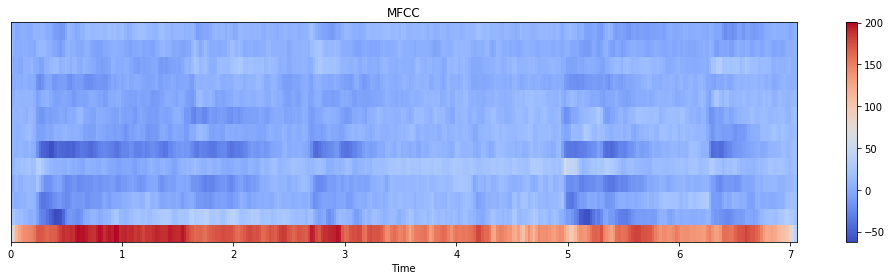

In [18]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfcc[1:14], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [19]:
mfccs = sklearn.preprocessing.scale(mfcc, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 5.13332067e-15 -2.17954310e-15  1.92828210e-16  5.98936105e-17
  1.54846896e-16  1.20335028e-16  2.38844032e-16 -2.90703134e-16
  2.50530590e-16 -2.09627637e-16  2.03784358e-16 -3.49501130e-16
 -4.69288351e-16 -2.67056114e-16  5.80675858e-17 -8.26093580e-16
  6.46047543e-16 -5.61959105e-16 -1.75298372e-16  8.36319318e-16
 -2.64408378e-16  4.45230475e-16 -2.32818151e-16  2.05975587e-16
 -4.41897980e-16 -2.61121534e-16 -7.34974946e-17 -1.07735458e-16
  4.74766425e-18  9.27620553e-17  8.83795960e-17 -4.32767857e-17
 -7.66930379e-18 -1.67994273e-17 -6.97541440e-17  6.20848402e-17
  2.19122965e-17  4.94852697e-17 -5.98936105e-17  3.50824998e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


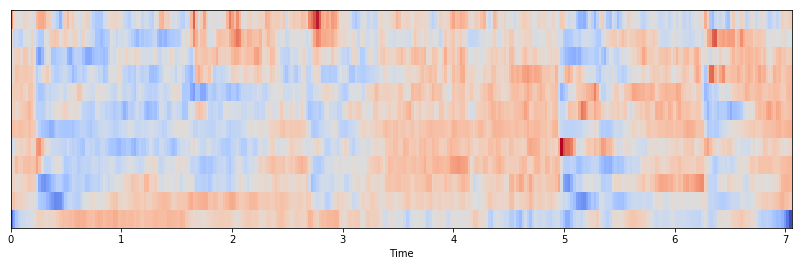

In [20]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs[1:13], sr=sr, x_axis='time')
pass

In [21]:
filename = '../data/raw/train_curated/015a50b9.wav'

In [22]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

In [23]:
ipd.Audio(filename) # load a local WAV file

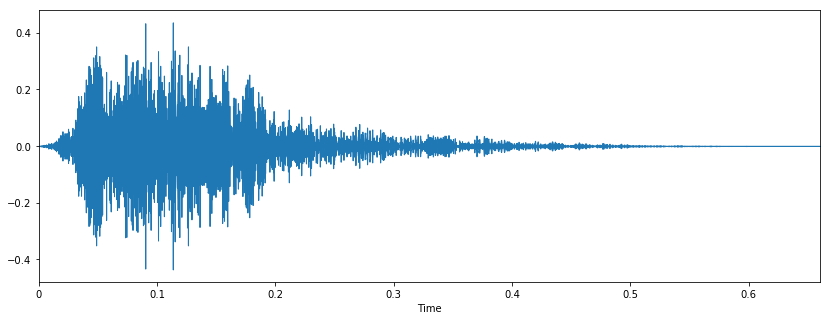

In [24]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [25]:
sr*0.010

220.5

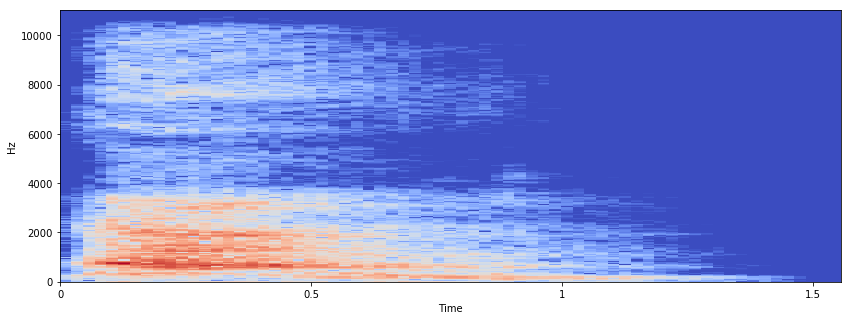

In [26]:
Y = librosa.stft(y,  n_fft=512, win_length=512,hop_length=220)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

In [27]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [28]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 198.77 beats per minute


In [29]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [30]:
beat_times

array([0.06965986])

#### MFCC

In [31]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
# also N of FFT is defined with this value
hop_length = 512

In [32]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, dct_type=2, n_mfcc=40)

In [33]:
mfcc

array([[-3.33876121e+02, -2.21814655e+02, -1.49673940e+02, ...,
        -6.31383168e+02, -6.38401660e+02, -6.44422076e+02],
       [ 1.53458726e+02,  1.38588866e+02,  1.35984650e+02, ...,
         1.87214581e+01,  8.99729873e+00,  5.55793344e-01],
       [-3.56577165e+01, -5.25150730e+01, -6.56036865e+01, ...,
         1.79283462e+01,  8.75994219e+00,  5.34327641e-01],
       ...,
       [-1.90411849e+00, -3.51761971e+00, -6.39282616e+00, ...,
         2.25538449e+00,  2.26154987e+00,  2.98921845e-01],
       [-6.81510936e+00, -3.23380624e+00, -5.41186115e+00, ...,
         2.24373389e+00,  2.10046891e+00,  2.59793742e-01],
       [-7.26823613e+00, -6.84676682e+00, -7.50360603e+00, ...,
         1.96096465e+00,  1.86270922e+00,  2.09937112e-01]])

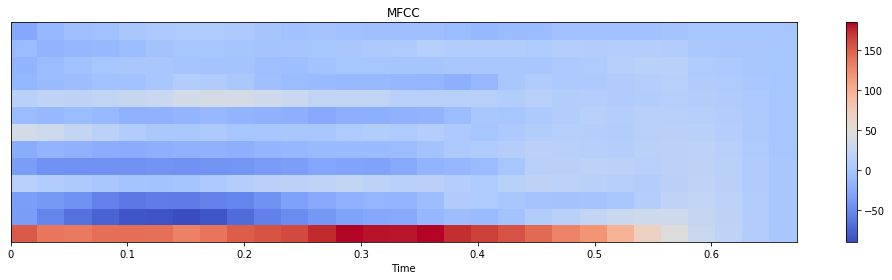

In [34]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfcc[1:14], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [35]:
mfccs = sklearn.preprocessing.scale(mfcc, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-9.18805262e-16  1.53134210e-16 -2.02902829e-16  2.94783355e-16
 -3.21581842e-16 -1.56962566e-16 -1.91417763e-17  6.89103946e-17
 -1.18679013e-16 -3.06268421e-17  8.03954604e-17 -4.25904522e-17
  5.93395065e-17 -8.03954604e-17  1.08725289e-15 -1.14850658e-16
 -3.82835526e-18 -2.75641579e-16 -1.18679013e-16  3.02440065e-16
 -6.22107729e-17 -1.91417763e-17  2.72770312e-17  5.35969736e-17
  5.55111512e-17 -1.60790921e-16 -2.39272204e-17 -1.03365592e-16
  1.91417763e-17  1.45477500e-16  7.56100163e-17  4.21119078e-17
  2.06731184e-16  2.14387894e-16  5.98180509e-17 -1.53134210e-17
 -5.58939868e-16  2.83298289e-16 -9.37947038e-17  7.65671051e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


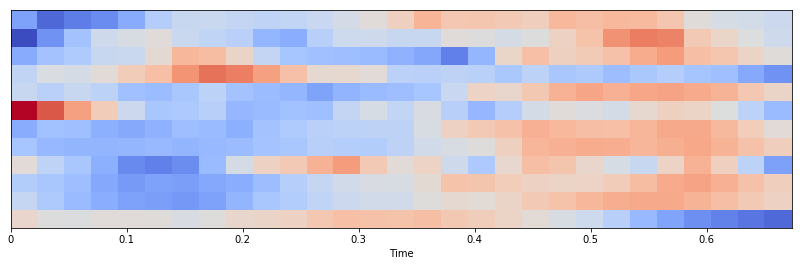

In [36]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs[1:13], sr=sr, x_axis='time')
pass

In [37]:
filename = '../data/raw/train_curated/08bbd169.wav'

In [38]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

In [39]:
ipd.Audio(filename) # load a local WAV file

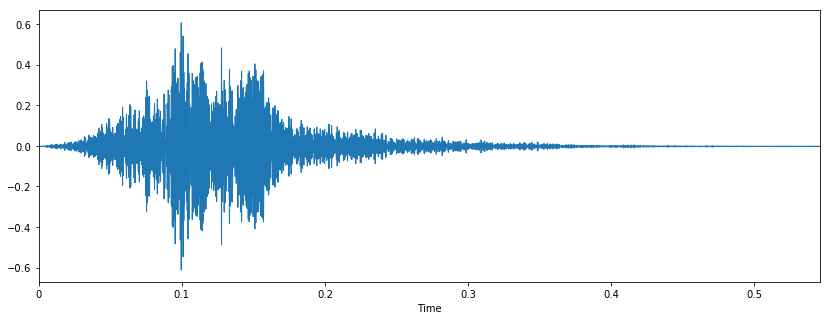

In [40]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [41]:
sr*0.010

220.5

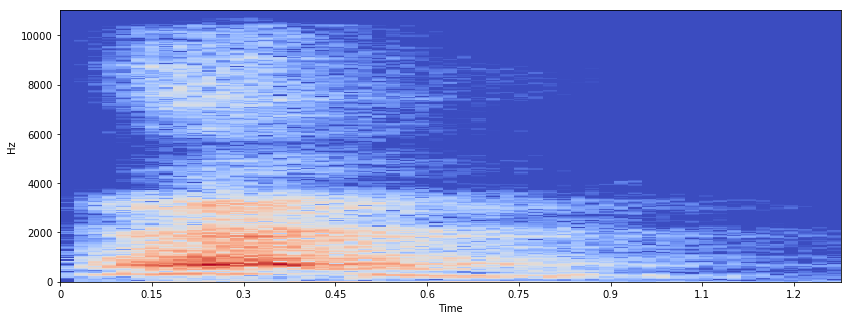

In [42]:
Y = librosa.stft(y,  n_fft=512, win_length=512,hop_length=220)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

In [43]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [44]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 198.77 beats per minute


In [45]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [46]:
beat_times

array([0.09287982])

#### MFCC

In [47]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
# also N of FFT is defined with this value
hop_length = 512

In [48]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, dct_type=2, n_mfcc=40)

In [49]:
mfcc

array([[-4.04876901e+02, -3.14857079e+02, -2.23321765e+02,
        -1.61477840e+02, -1.18948127e+02, -1.09791920e+02,
        -1.31006385e+02, -1.63834333e+02, -2.01640960e+02,
        -2.32028962e+02, -2.65771697e+02, -3.07015380e+02,
        -3.40494146e+02, -3.62456051e+02, -3.81296561e+02,
        -4.00211756e+02, -4.24737685e+02, -4.53333391e+02,
        -4.78158976e+02, -5.00500037e+02, -5.20724026e+02,
        -5.36242598e+02, -5.52350606e+02, -5.61506082e+02],
       [ 1.40579736e+02,  1.58503215e+02,  1.49336518e+02,
         1.40950128e+02,  1.33788672e+02,  1.28031550e+02,
         1.20758362e+02,  1.22253357e+02,  1.33263326e+02,
         1.49706488e+02,  1.56856888e+02,  1.57404388e+02,
         1.59432175e+02,  1.57868482e+02,  1.54081903e+02,
         1.50506565e+02,  1.35334828e+02,  1.15946649e+02,
         1.03897105e+02,  8.92339708e+01,  7.69543515e+01,
         6.63032959e+01,  5.29482104e+01,  4.68723150e+01],
       [-2.79486516e+01, -4.54937269e+01, -5.19672817e

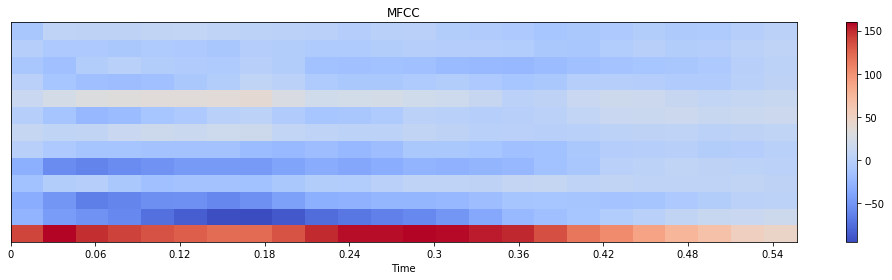

In [50]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfcc[1:14], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [51]:
mfccs = sklearn.preprocessing.scale(mfcc, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 6.75385673e-16 -3.70074342e-16 -8.32667268e-17  3.70074342e-17
  0.00000000e+00 -4.62592927e-17  1.85037171e-17  2.83338168e-17
  2.49800181e-16 -2.96059473e-16  2.40548322e-16 -7.40148683e-17
 -5.55111512e-17 -7.86407976e-17  9.25185854e-17 -1.71159383e-16
 -4.16333634e-17  3.70074342e-17  1.66533454e-16  1.75785312e-16
 -1.01770444e-16 -7.28583860e-17  3.23815049e-17  5.55111512e-17
  1.85037171e-16  3.70074342e-16 -1.66533454e-16 -2.96059473e-16
 -5.55111512e-17 -5.55111512e-17 -9.25185854e-18  1.28369537e-16
  1.94289029e-16 -3.70074342e-17 -1.34151949e-16 -4.43800089e-17
 -3.35379872e-17  1.83880688e-16 -4.57966998e-16  1.38777878e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


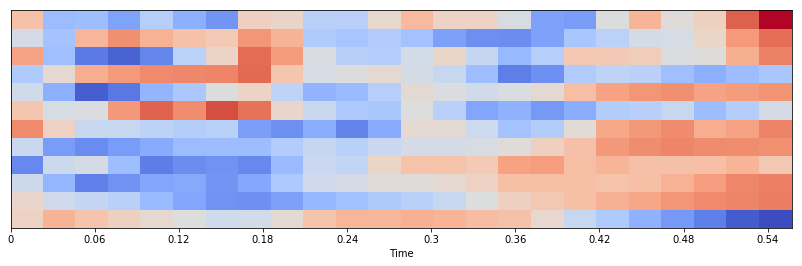

In [52]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs[1:13], sr=sr, x_axis='time')
pass

In [53]:
filename = '../data/raw/train_curated/0b593941.wav'

In [54]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

In [55]:
ipd.Audio(filename) # load a local WAV file

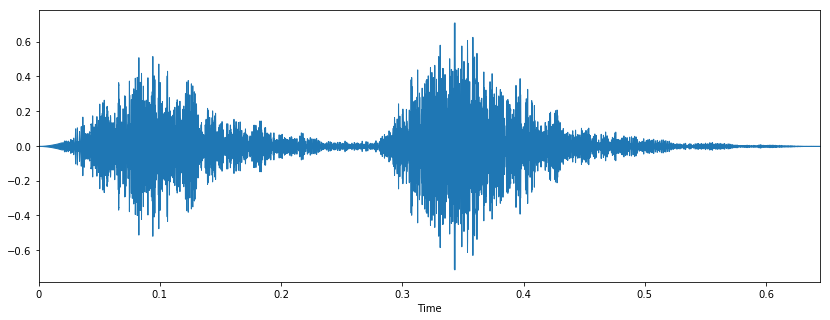

In [56]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

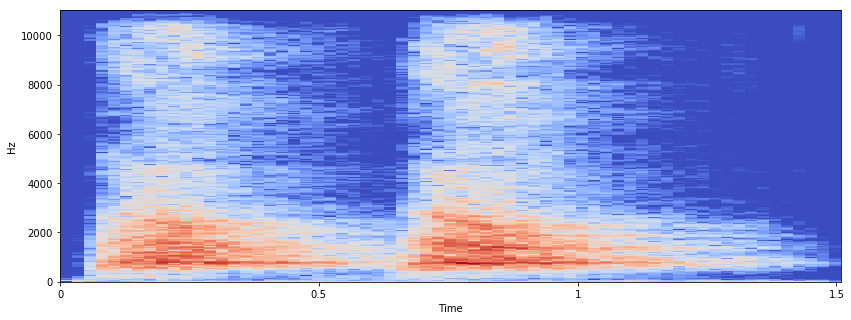

In [57]:
Y = librosa.stft(y,  n_fft=512, win_length=512,hop_length=220)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

In [58]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [59]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 234.91 beats per minute


In [60]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

#### MFCC

In [61]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
# also N of FFT is defined with this value
hop_length = 512

In [62]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, dct_type=2, n_mfcc=40)

In [63]:
mfcc

array([[-3.90474181e+02, -2.31291012e+02, -1.33817341e+02, ...,
        -4.69748424e+02, -5.09908126e+02, -5.55377666e+02],
       [ 1.45926435e+02,  1.26938643e+02,  1.02912508e+02, ...,
         1.04172940e+02,  8.18748691e+01,  5.26303520e+01],
       [-3.25167676e+01, -6.58115060e+01, -8.76005282e+01, ...,
        -4.86522831e+01, -2.69069033e+01, -5.58093800e+00],
       ...,
       [ 5.99335196e+00,  3.66920599e+00,  1.67897054e+00, ...,
         6.34809310e+00,  3.38966217e+00,  5.17476257e+00],
       [ 1.41560886e+01,  5.84804212e+00, -2.80307510e-01, ...,
         1.13025338e+00,  1.49715134e+00,  4.26991118e+00],
       [ 1.08435605e+01,  1.08571639e+01,  8.23381831e+00, ...,
         1.69937894e+00,  2.01284438e+00,  1.19048413e+00]])

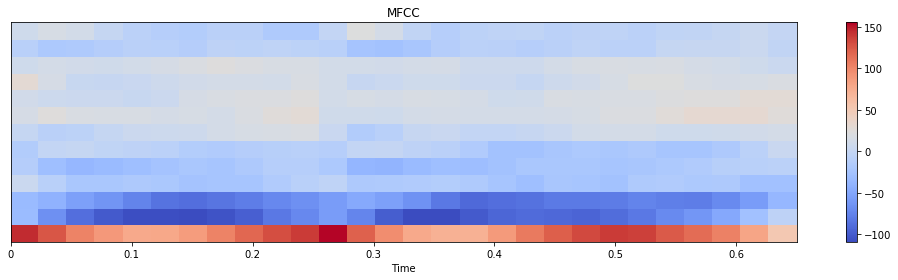

In [64]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfcc[1:14], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [65]:
mfccs = sklearn.preprocessing.scale(mfcc, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 2.53765263e-16  6.18552828e-16  3.33066907e-16  8.56457762e-16
 -2.06184276e-16 -6.10622664e-16 -1.82393783e-16 -1.34812796e-16
 -4.52019374e-16 -2.22044605e-16  3.17206578e-16 -3.17206578e-16
  7.53365624e-17  3.76682812e-17 -1.11022302e-16  9.51619735e-17
  9.91270558e-17 -9.51619735e-17  5.15460690e-17  1.65542183e-16
  2.37904934e-17 -1.92306488e-16  5.94762335e-18 -2.77555756e-17
  1.58603289e-16  6.50273486e-16 -1.37786608e-16 -2.22044605e-16
 -1.58603289e-17 -7.53365624e-17 -1.74463618e-16  3.96508223e-17
  5.60067865e-17 -4.00473305e-16  5.55111512e-17 -7.93016446e-18
 -1.08048491e-16  1.86358865e-16 -1.70498536e-16 -1.63373779e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


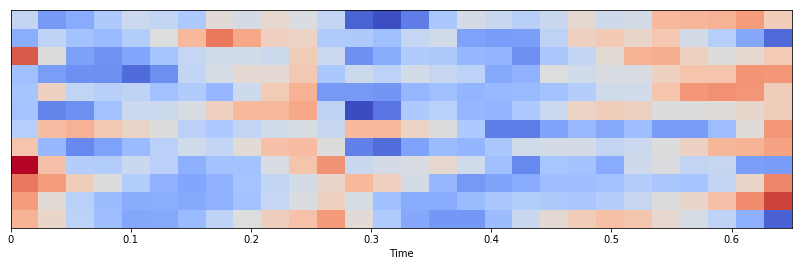

In [66]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfccs[1:13], sr=sr, x_axis='time')
pass